In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('ECommerce.xlsx')
df.head()

,CustomerID,Buy,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,5,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,0,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df = df.drop(['CustomerID'], axis=1)

In [5]:
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].mean())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mean())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean())
df['Tenure'] = df['Tenure'].astype(int)

In [6]:
numerical_values = df.select_dtypes('number').columns.tolist()
categorical_values = df.select_dtypes('object').columns.tolist()
print(f'São {len(numerical_values)} valores numericos. Eles são: {numerical_values}\n')
print(f'São {len(categorical_values)} valores categoricosd. Eles são {categorical_values}')

São 14 valores numericos. Eles são: ['Buy', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

São 5 valores categoricosd. Eles são ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [7]:

from sklearn.preprocessing import LabelEncoder

def label_encoder_dataframe(df, columns_to_encode):
    le = LabelEncoder()

    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print('The list has columns that do not exist in the DataFrame.')

    return df

columns_to_encode = categorical_values
label_encoder_dataframe(df, columns_to_encode)
df.head()

,Buy,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,1,3,6.0,4,0,3.000000,3,2,5,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10,2,1,8.0,6,1,3.000000,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,0,10,2,1,30.0,4,1,2.000000,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0,2,3,15.0,4,1,2.000000,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0,2,1,12.0,0,1,2.931535,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
df.corr()['Buy']

Buy                            1.000000
Tenure                        -0.016153
PreferredLoginDevice           0.034338
CityTier                      -0.029174
WarehouseToHome                0.011385
PreferredPaymentMode          -0.022049
Gender                        -0.021171
HourSpendOnApp                -0.032429
NumberOfDeviceRegistered      -0.045837
PreferedOrderCat              -0.010458
SatisfactionScore              0.605843
MaritalStatus                 -0.030517
NumberOfAddress                0.020962
Complain                      -0.014480
OrderAmountHikeFromlastYear   -0.058965
CouponUsed                    -0.010050
OrderCount                    -0.004235
DaySinceLastOrder             -0.009585
CashbackAmount                -0.010091
Name: Buy, dtype: float64

In [9]:
x = df.drop('Buy', axis=1)
y = df['Buy']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [11]:
x_train.shape, y_train.shape

((3941, 18), (3941,))

In [12]:
x_test.shape, y_test.shape

((1689, 18), (1689,))

In [13]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
y_pred = xgb_classifier.predict(x_test)

In [15]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [16]:
y_test

2199    1
4859    0
5609    1
4803    0
3388    0
       ..
823     1
2735    1
4229    1
345     1
673     1
Name: Buy, Length: 1689, dtype: int64

In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8306690349319124

Matriz de Confusão: 
[[ 321  158]
 [ 128 1082]]


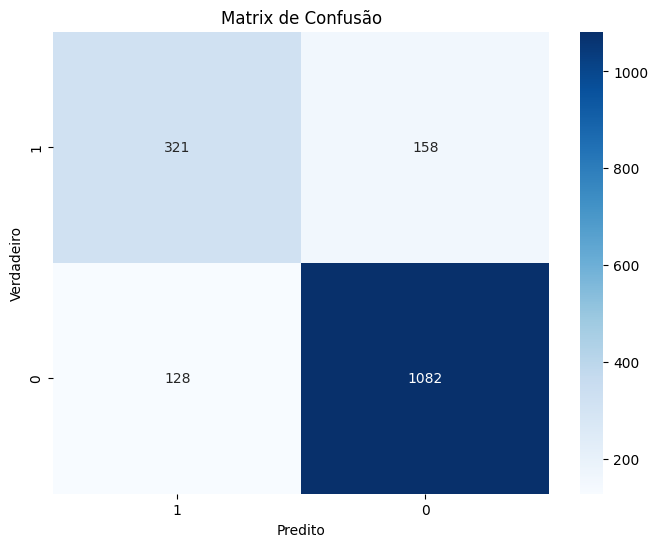

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão: ')
print(conf_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels = df['Buy'].unique(),
            yticklabels = df['Buy'].unique())

plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matrix de Confusão')
plt.show()

In [28]:
df.head()

,Buy,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,1,3,6.0,4,0,3.000000,3,2,5,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10,2,1,8.0,6,1,3.000000,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,0,10,2,1,30.0,4,1,2.000000,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0,2,3,15.0,4,1,2.000000,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0,2,1,12.0,0,1,2.931535,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [29]:
browsing_data = np.array([2,1,1,60.0,0,1,1.000000,3,2,2,1,3,0,11.0,0.0,1.0,3.0,100.00]).reshape(1,-1)
print('Novo cliente: propensity: ', xgb_classifier.predict_proba(browsing_data)[:,1])

Novo cliente: propensity:  [0.92851967]
